In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from openbb import obb
obb.user.preferences.output_type = "dataframe"

# Compare NVIDIA stock returns with those of suppliers and competitors

This is the number of days we'll look back to calculate the rolling z score.

In [2]:
window = 22

In [3]:
thresh = 1.5

Set the start date to 6 calendar years ago.

In [4]:
today = pd.Timestamp.today().strftime("%Y-%m-%d")
start_date = (pd.Timestamp.today() - pd.Timedelta(days=365*6)).strftime("%Y-%m-%d")

## Use openbb to get the data for our tickers

Nvidia (NVDA) and other stocks in the chip and AI ecosystems

In [5]:
nvda = obb.equity.price.historical(
    "NVDA",
    start_date = start_date,
    end_date = today,
    provider="yfinance"
).close
nvda.name = "nvda"

In [6]:
asml = obb.equity.price.historical(
    "ASML",
    start_date = start_date,
    end_date = today,
    provider="yfinance"
).close
asml.name = "asml"

In [7]:
tsm = obb.equity.price.historical(
    "TSM",
    start_date = start_date,
    end_date = today,
    provider="yfinance"
).close
tsm.name = "tsm"

In [8]:
arm = obb.equity.price.historical(
    "ARM",
    start_date = start_date,
    end_date = today,
    provider="yfinance"
).close
arm.name = "arm"

In [9]:
amd = obb.equity.price.historical(
    "AMD",
    start_date = start_date,
    end_date = today,
    provider="yfinance"
).close
amd.name = "amd"

In [10]:
smci = obb.equity.price.historical(
    "SMCI",
    start_date = start_date,
    end_date = today,
    provider="yfinance"
).close
smci.name = "smci"

In [11]:
smci

date
2018-10-11     1.305000
2018-10-12     1.311000
2018-10-15     1.377000
2018-10-16     1.334000
2018-10-17     1.355000
                ...    
2024-10-03    41.549999
2024-10-04    41.230000
2024-10-07    47.740002
2024-10-08    45.349998
2024-10-09    47.525002
Name: smci, Length: 1508, dtype: float64

Now put all the prices together (except ARM, which did not trade before 2023).

In [12]:
data = pd.concat([nvda, asml, tsm, amd, smci], axis = 1).dropna()

In [13]:
data

,nvda,asml,tsm,amd,smci
date,,,,,
2018-10-11,5.878250,171.779999,38.939999,25.299999,1.305000
2018-10-12,6.163500,174.279999,39.660000,26.340000,1.311000
2018-10-15,5.884500,173.350006,38.750000,26.260000,1.377000
2018-10-16,6.145750,181.720001,40.009998,28.180000,1.334000
2018-10-17,6.076500,185.009995,39.570000,27.299999,1.355000
...,...,...,...,...,...
2024-10-02,118.849998,832.190002,175.800003,159.779999,42.000000
2024-10-03,122.849998,832.409973,179.479996,162.850006,41.549999
2024-10-04,124.919998,833.000000,181.160004,170.899994,41.230000


## Compare the tickers' prices

### Compare NVDA and ARM

In [14]:
data["nvda_arm_ratio"] = nvda / arm

In [15]:
data

,nvda,asml,tsm,amd,smci,nvda_arm_ratio
date,,,,,,
2018-10-11,5.878250,171.779999,38.939999,25.299999,1.305000,NaN
2018-10-12,6.163500,174.279999,39.660000,26.340000,1.311000,NaN
2018-10-15,5.884500,173.350006,38.750000,26.260000,1.377000,NaN
2018-10-16,6.145750,181.720001,40.009998,28.180000,1.334000,NaN
2018-10-17,6.076500,185.009995,39.570000,27.299999,1.355000,NaN
...,...,...,...,...,...,...
2024-10-02,118.849998,832.190002,175.800003,159.779999,42.000000,0.867328
2024-10-03,122.849998,832.409973,179.479996,162.850006,41.549999,0.888672
2024-10-04,124.919998,833.000000,181.160004,170.899994,41.230000,0.888794


<Axes: xlabel='date'>

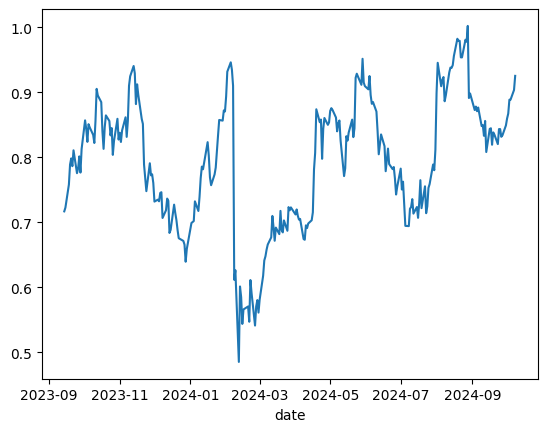

In [16]:
data.nvda_arm_ratio.plot()

### For other companies, normalize prices to have a common starting point

In [17]:
nvda_first_price = data.iloc[0]['nvda']
asml_first_price = data.iloc[0]['asml']
tsm_first_price = data.iloc[0]['tsm']
amd_first_price = data.iloc[0]['amd']
smci_first_price = data.iloc[0]['smci']
# Divide each series by its first value to get a set os series that start at 1
data['nvda_normalized'] = data['nvda'] / nvda_first_price
data['asml_normalized'] = data['asml'] / asml_first_price
data['tsm_normalized'] = data['tsm'] / tsm_first_price
data['amd_normalized'] = data['amd'] / amd_first_price
data['smci_normalized'] = data['smci'] / smci_first_price

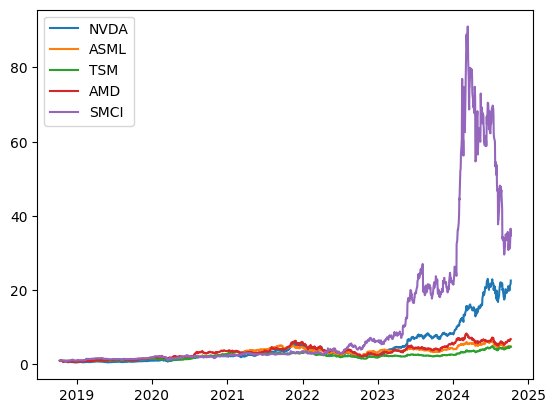

In [18]:
plt.plot(data['nvda_normalized'])
plt.plot(data['asml_normalized'])
plt.plot(data['tsm_normalized'])
plt.plot(data['amd_normalized'])
plt.plot(data['smci_normalized'])
plt.legend(['NVDA', 'ASML', 'TSM', 'AMD', 'SMCI'], loc="upper left")
plt.show()

In [19]:
data

,nvda,asml,tsm,amd,smci,nvda_arm_ratio,nvda_normalized,asml_normalized,tsm_normalized,amd_normalized,smci_normalized
date,,,,,,,,,,,
2018-10-11,5.878250,171.779999,38.939999,25.299999,1.305000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000
2018-10-12,6.163500,174.279999,39.660000,26.340000,1.311000,NaN,1.048526,1.014553,1.018490,1.041107,1.004598
2018-10-15,5.884500,173.350006,38.750000,26.260000,1.377000,NaN,1.001063,1.009140,0.995121,1.037945,1.055172
2018-10-16,6.145750,181.720001,40.009998,28.180000,1.334000,NaN,1.045507,1.057865,1.027478,1.113834,1.022222
2018-10-17,6.076500,185.009995,39.570000,27.299999,1.355000,NaN,1.033726,1.077017,1.016179,1.079051,1.038314
...,...,...,...,...,...,...,...,...,...,...,...
2024-10-02,118.849998,832.190002,175.800003,159.779999,42.000000,0.867328,20.218602,4.844510,4.514638,6.315415,32.183909
2024-10-03,122.849998,832.409973,179.479996,162.850006,41.549999,0.888672,20.899076,4.845791,4.609142,6.436759,31.839081
2024-10-04,124.919998,833.000000,181.160004,170.899994,41.230000,0.888794,21.251222,4.849226,4.652286,6.754941,31.593871


In [20]:
data["nvda"].iloc[-30:]

date
2024-08-27    128.300003
2024-08-28    125.610001
2024-08-29    117.589996
2024-08-30    119.370003
2024-09-03    108.000000
2024-09-04    106.209999
2024-09-05    107.209999
2024-09-06    102.830002
2024-09-09    106.470001
2024-09-10    108.099998
2024-09-11    116.910004
2024-09-12    119.139999
2024-09-13    119.099998
2024-09-16    116.779999
2024-09-17    115.589996
2024-09-18    113.370003
2024-09-19    117.870003
2024-09-20    116.000000
2024-09-23    116.260002
2024-09-24    120.870003
2024-09-25    123.510002
2024-09-26    124.040001
2024-09-27    121.400002
2024-09-30    121.440002
2024-10-01    117.000000
2024-10-02    118.849998
2024-10-03    122.849998
2024-10-04    124.919998
2024-10-07    127.720001
2024-10-08    132.889999
Name: nvda, dtype: float64

In [21]:
data['industry_peer_index'] = (data['asml_normalized'] + data['tsm_normalized']
                               + data['amd_normalized'] + data['smci_normalized']) / 4

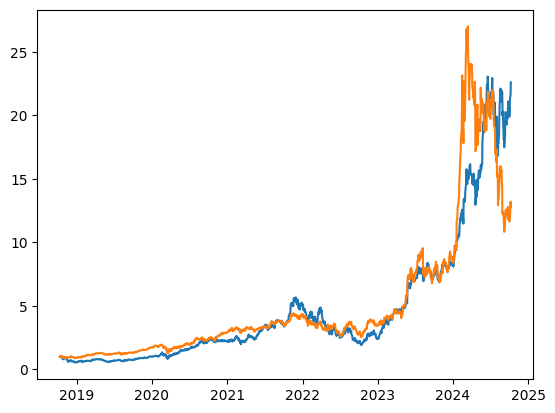

In [22]:
plt.plot(data['nvda_normalized'])
plt.plot(data['industry_peer_index'])
plt.show()

In [23]:
data['nvda_vs_industry'] = data['nvda_normalized'] / data['industry_peer_index'] 

<Axes: xlabel='date'>

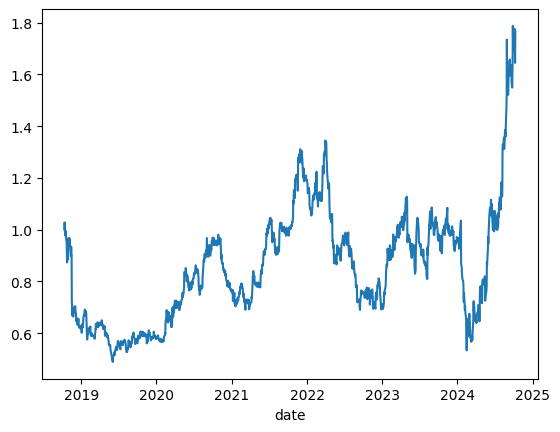

In [24]:
data.nvda_vs_industry.plot()

In [25]:
data

,nvda,asml,tsm,amd,smci,nvda_arm_ratio,nvda_normalized,asml_normalized,tsm_normalized,amd_normalized,smci_normalized,industry_peer_index,nvda_vs_industry
date,,,,,,,,,,,,,
2018-10-11,5.878250,171.779999,38.939999,25.299999,1.305000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2018-10-12,6.163500,174.279999,39.660000,26.340000,1.311000,NaN,1.048526,1.014553,1.018490,1.041107,1.004598,1.019687,1.028282
2018-10-15,5.884500,173.350006,38.750000,26.260000,1.377000,NaN,1.001063,1.009140,0.995121,1.037945,1.055172,1.024344,0.977272
2018-10-16,6.145750,181.720001,40.009998,28.180000,1.334000,NaN,1.045507,1.057865,1.027478,1.113834,1.022222,1.055350,0.990673
2018-10-17,6.076500,185.009995,39.570000,27.299999,1.355000,NaN,1.033726,1.077017,1.016179,1.079051,1.038314,1.052640,0.982031
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-02,118.849998,832.190002,175.800003,159.779999,42.000000,0.867328,20.218602,4.844510,4.514638,6.315415,32.183909,11.964618,1.689866
2024-10-03,122.849998,832.409973,179.479996,162.850006,41.549999,0.888672,20.899076,4.845791,4.609142,6.436759,31.839081,11.932693,1.751413
2024-10-04,124.919998,833.000000,181.160004,170.899994,41.230000,0.888794,21.251222,4.849226,4.652286,6.754941,31.593871,11.962581,1.776475


## Pairs trade vs. industry average

Compute the rolling z-score of the ratio of the normalized NVDA price to the normalized average price of the 4 peer companies. This helps normalize the ratio. We can use the z-score as our trading signal.

In [26]:
data["z"] = (
  data.nvda_vs_industry
  - data.nvda_vs_industry.rolling(window=window).mean()
) / data.nvda_vs_industry.rolling(window=window).std()

In [27]:
data

,nvda,asml,tsm,amd,smci,nvda_arm_ratio,nvda_normalized,asml_normalized,tsm_normalized,amd_normalized,smci_normalized,industry_peer_index,nvda_vs_industry,z
date,,,,,,,,,,,,,,
2018-10-11,5.878250,171.779999,38.939999,25.299999,1.305000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
2018-10-12,6.163500,174.279999,39.660000,26.340000,1.311000,NaN,1.048526,1.014553,1.018490,1.041107,1.004598,1.019687,1.028282,NaN
2018-10-15,5.884500,173.350006,38.750000,26.260000,1.377000,NaN,1.001063,1.009140,0.995121,1.037945,1.055172,1.024344,0.977272,NaN
2018-10-16,6.145750,181.720001,40.009998,28.180000,1.334000,NaN,1.045507,1.057865,1.027478,1.113834,1.022222,1.055350,0.990673,NaN
2018-10-17,6.076500,185.009995,39.570000,27.299999,1.355000,NaN,1.033726,1.077017,1.016179,1.079051,1.038314,1.052640,0.982031,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-02,118.849998,832.190002,175.800003,159.779999,42.000000,0.867328,20.218602,4.844510,4.514638,6.315415,32.183909,11.964618,1.689866,0.938857
2024-10-03,122.849998,832.409973,179.479996,162.850006,41.549999,0.888672,20.899076,4.845791,4.609142,6.436759,31.839081,11.932693,1.751413,1.705561
2024-10-04,124.919998,833.000000,181.160004,170.899994,41.230000,0.888794,21.251222,4.849226,4.652286,6.754941,31.593871,11.962581,1.776475,1.853229


Now we create a long position (represented by 1) if the z-score falls below the lower threshold. We create a short position (represented by -1) if the z-score rises above the upper threshold. In other words, if the normalized difference between the spread and the refiner is at an extreme value, we expect it to revert back to its mean.

In [28]:
data["position"] = np.select(
    [data.z < -thresh, data.z > thresh],
    [1, -1],
    default=0
)

Calculate the returns on owning NVDA

In [29]:
data["nvda_returns"] = data.nvda.apply(np.log).diff(1)

In [30]:
data

,nvda,asml,tsm,amd,smci,nvda_arm_ratio,nvda_normalized,asml_normalized,tsm_normalized,amd_normalized,smci_normalized,industry_peer_index,nvda_vs_industry,z,position,nvda_returns
date,,,,,,,,,,,,,,,,
2018-10-11,5.878250,171.779999,38.939999,25.299999,1.305000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0,NaN
2018-10-12,6.163500,174.279999,39.660000,26.340000,1.311000,NaN,1.048526,1.014553,1.018490,1.041107,1.004598,1.019687,1.028282,NaN,0,0.047386
2018-10-15,5.884500,173.350006,38.750000,26.260000,1.377000,NaN,1.001063,1.009140,0.995121,1.037945,1.055172,1.024344,0.977272,NaN,0,-0.046323
2018-10-16,6.145750,181.720001,40.009998,28.180000,1.334000,NaN,1.045507,1.057865,1.027478,1.113834,1.022222,1.055350,0.990673,NaN,0,0.043439
2018-10-17,6.076500,185.009995,39.570000,27.299999,1.355000,NaN,1.033726,1.077017,1.016179,1.079051,1.038314,1.052640,0.982031,NaN,0,-0.011332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-02,118.849998,832.190002,175.800003,159.779999,42.000000,0.867328,20.218602,4.844510,4.514638,6.315415,32.183909,11.964618,1.689866,0.938857,0,0.015688
2024-10-03,122.849998,832.409973,179.479996,162.850006,41.549999,0.888672,20.899076,4.845791,4.609142,6.436759,31.839081,11.932693,1.751413,1.705561,-1,0.033102
2024-10-04,124.919998,833.000000,181.160004,170.899994,41.230000,0.888794,21.251222,4.849226,4.652286,6.754941,31.593871,11.962581,1.776475,1.853229,-1,0.016709


To compute the strategy returns, we multiply the position value by the return. We shift the position data by one day, aligning yesterday's position with today's returns, and then multiply it with VLO's returns for the current period. If the position value is 1 (long) and the return is positive, we have a positive return for that day. If the position value is 1 (long) and the return is negative, we have a negative return for that day.

In [31]:
strategy_returns = data.position.shift(1) * data.nvda_returns

In [32]:
strategy_returns

date
2018-10-11         NaN
2018-10-12    0.000000
2018-10-15   -0.000000
2018-10-16    0.000000
2018-10-17   -0.000000
                ...   
2024-10-02    0.000000
2024-10-03    0.000000
2024-10-04   -0.016709
2024-10-07   -0.022167
2024-10-08    0.000000
Length: 1507, dtype: float64

In [33]:
strategy_returns.dtypes

dtype('float64')

In [34]:
strategy_returns.index

Index([2018-10-11, 2018-10-12, 2018-10-15, 2018-10-16, 2018-10-17, 2018-10-18,
       2018-10-19, 2018-10-22, 2018-10-23, 2018-10-24,
       ...
       2024-09-25, 2024-09-26, 2024-09-27, 2024-09-30, 2024-10-01, 2024-10-02,
       2024-10-03, 2024-10-04, 2024-10-07, 2024-10-08],
      dtype='object', name='date', length=1507)